In [1]:
library(ggplot2)

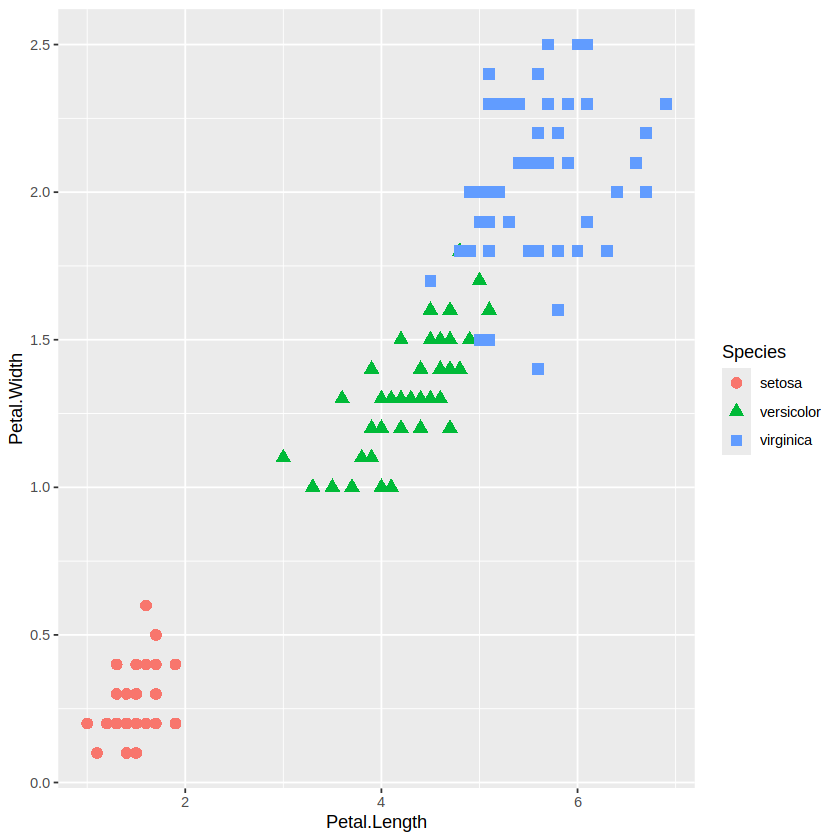

In [2]:
# 종에 따라 색상 지정하여 산점도
p <- ggplot(iris, aes(Petal.Length, Petal.Width,
                      color=Species, shape=Species))
p + geom_point(size=3)

In [3]:
# 3개의 변수만 데이터 petal로 저장/확인
petal <- iris[3:5]
head(petal)

,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<fct>
1,1.4,0.2,setosa
2,1.4,0.2,setosa
3,1.3,0.2,setosa
4,1.5,0.2,setosa
5,1.4,0.2,setosa
6,1.7,0.4,setosa


In [4]:
# 3개의 중심으로 군집 분석(분류)
petal.kmeans <- kmeans(petal[1:2], centers=3, iter.max=1000)
petal.kmeans

K-means clustering with 3 clusters of sizes 48, 50, 52

Cluster means:
  Petal.Length Petal.Width
1     5.595833    2.037500
2     1.462000    0.246000
3     4.269231    1.342308

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 1 1 1 1
[112] 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1] 16.29167  2.02200 13.05769
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [5]:
centers <- as.data.frame(petal.kmeans$centers)
centers

,Petal.Length,Petal.Width
,<dbl>,<dbl>
1,5.595833,2.037500
2,1.462000,0.246000
3,4.269231,1.342308


In [6]:
petal.kmeans$size

[1] 48 50 52

In [7]:
petal.kmeans$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 1 1 1 1
[112] 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
[149] 1 1

In [8]:
# 원래 종과 분류된 결과 비교 - virginica가 다른 번호로 분류된 몇 개 확인
petal$cluster <- petal.kmeans$cluster
petal[120:130, ]

,Petal.Length,Petal.Width,Species,cluster
,<dbl>,<dbl>,<fct>,<int>
120,5.0,1.5,virginica,3
121,5.7,2.3,virginica,1
122,4.9,2.0,virginica,1
123,6.7,2.0,virginica,1
124,4.9,1.8,virginica,1
125,5.7,2.1,virginica,1
126,6.0,1.8,virginica,1
127,4.8,1.8,virginica,3
128,4.9,1.8,virginica,1


In [9]:
# 교차표로 확인 - 결과는 실행시 마다 다를 수 있음
table(petal$Species, petal$cluster)

            
              1  2  3
  setosa      0 50  0
  versicolor  2  0 48
  virginica  46  0  4

In [10]:
table(petal$Petal.Length)


  1 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9   3 3.3 3.5 3.6 3.7 3.8 3.9   4 4.1 4.2 4.3 
  1   1   2   7  13  13   7   4   2   1   2   2   1   1   1   3   5   3   4   2 
4.4 4.5 4.6 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9   6 6.1 6.3 6.4 
  4   8   3   5   4   5   4   8   2   2   2   3   6   3   3   2   2   3   1   1 
6.6 6.7 6.9 
  1   2   1 

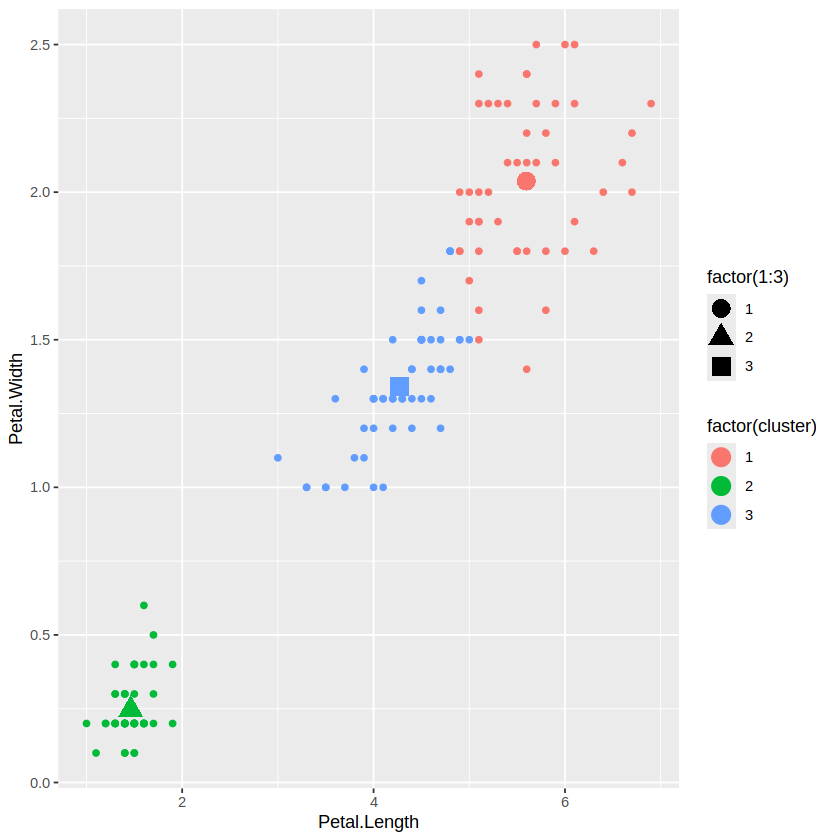

In [11]:
# 분류 중심 포함하여 산점도 그리기
p <- ggplot(petal, aes(Petal.Length, Petal.Width))
p <- p + geom_point(aes(color=factor(cluster)))
p + geom_point(data=centers, aes(Petal.Length, Petal.Width,
        color=factor(1:3), shape=factor(1:3)), size=5)

In [12]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



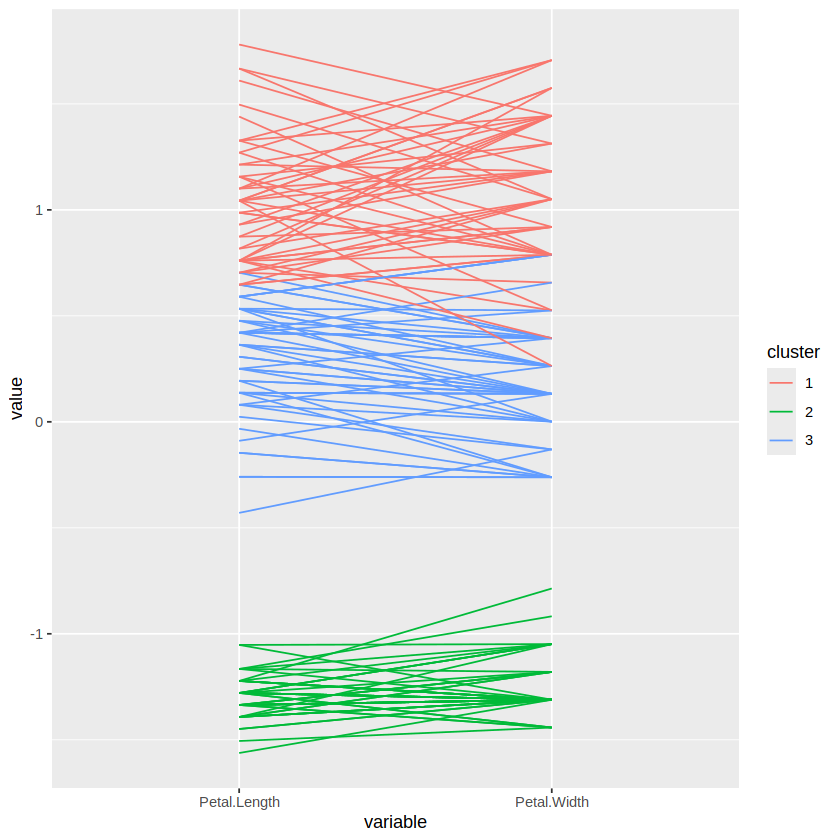

In [13]:
petal$cluster <- as.factor(petal$cluster)

p <- ggparcoord(data=petal, columns=c(1:2),
        groupColumn = 'cluster',
        scale = 'std')
p

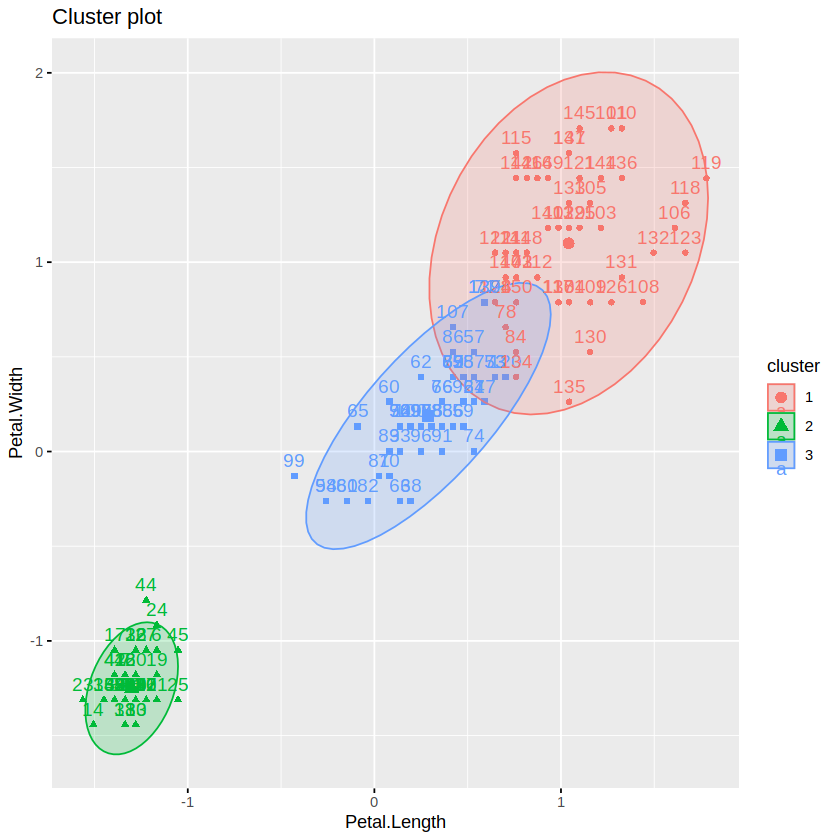

In [15]:
library(factoextra)

fviz_cluster(petal.kmeans, petal[1:2], ellipse.type='norm')

In [16]:
library(rpart)

r <- rpart(Species ~ ., data=iris)
r

Warning message:
“package ‘rpart’ was built under R version 4.3.3”


n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

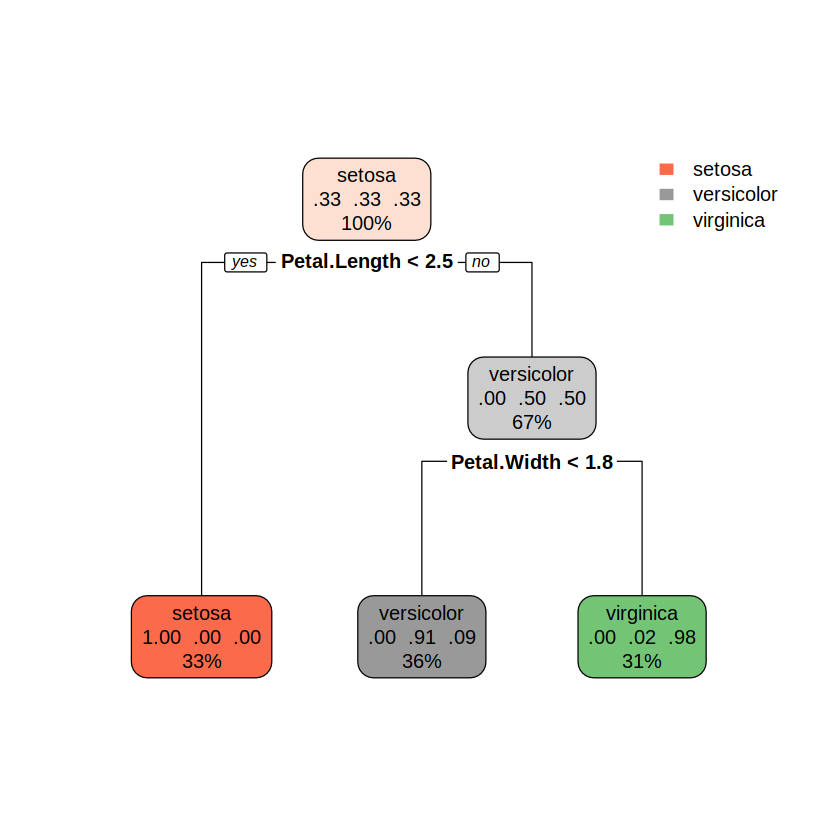

In [17]:
library(rpart.plot)

rpart.plot(r)

In [18]:
newdata <- iris[sample(1:150, 10), ]
newdata

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
20,5.1,3.8,1.5,0.3,setosa
62,5.9,3.0,4.2,1.5,versicolor
123,7.7,2.8,6.7,2.0,virginica
67,5.6,3.0,4.5,1.5,versicolor
5,5.0,3.6,1.4,0.2,setosa
82,5.5,2.4,3.7,1.0,versicolor
122,5.6,2.8,4.9,2.0,virginica
63,6.0,2.2,4.0,1.0,versicolor
100,5.7,2.8,4.1,1.3,versicolor


In [19]:
predict <- predict(r, newdata[1:4])
predict <- as.data.frame(predict)
cbind(predict, newdata$Species)

,setosa,versicolor,virginica,newdata$Species
,<dbl>,<dbl>,<dbl>,<fct>
20,1,0.00000000,0.00000000,setosa
62,0,0.90740741,0.09259259,versicolor
123,0,0.02173913,0.97826087,virginica
67,0,0.90740741,0.09259259,versicolor
5,1,0.00000000,0.00000000,setosa
82,0,0.90740741,0.09259259,versicolor
122,0,0.02173913,0.97826087,virginica
63,0,0.90740741,0.09259259,versicolor
100,0,0.90740741,0.09259259,versicolor


In [21]:
p <- predict(r, newdata[1:4], type='class')
as.data.frame(p)

,p
,<fct>
20,setosa
62,versicolor
123,virginica
67,versicolor
5,setosa
82,versicolor
122,virginica
63,versicolor
100,versicolor


In [23]:
table(p, newdata$Species)

            
p            setosa versicolor virginica
  setosa          2          0         0
  versicolor      0          6         0
  virginica       0          0         2

In [25]:
library(caret)

indexTrain <- createDataPartition(iris$Species, p=0.7, list=F)

training <- iris[ indexTrain, ]
testing  <- iris[-indexTrain, ]

In [27]:
str(training)

'data.frame':	105 obs. of  5 variables:
 $ Sepal.Length: num  4.9 4.6 5 5.4 4.6 4.4 4.9 5.4 4.8 4.3 ...
 $ Sepal.Width : num  3 3.1 3.6 3.9 3.4 2.9 3.1 3.7 3.4 3 ...
 $ Petal.Length: num  1.4 1.5 1.4 1.7 1.4 1.4 1.5 1.5 1.6 1.1 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.4 0.3 0.2 0.1 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [28]:
table(training$Species)


    setosa versicolor  virginica 
        35         35         35 

In [29]:
table(testing$Species)


    setosa versicolor  virginica 
        15         15         15 

In [30]:
library(rpart)

r <- rpart(Species ~ ., data=training)
r

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.3333333 0.3333333 0.3333333)  
  2) Petal.Length< 2.45 35  0 setosa (1.0000000 0.0000000 0.0000000) *
  3) Petal.Length>=2.45 70 35 versicolor (0.0000000 0.5000000 0.5000000)  
    6) Petal.Length< 4.75 31  0 versicolor (0.0000000 1.0000000 0.0000000) *
    7) Petal.Length>=4.75 39  4 virginica (0.0000000 0.1025641 0.8974359) *

In [32]:
testing$predict <- predict(r, testing, type='class')
tail(testing, 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,predict
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
114,5.7,2.5,5.0,2.0,virginica,virginica
115,5.8,2.8,5.1,2.4,virginica,virginica
116,6.4,3.2,5.3,2.3,virginica,virginica
117,6.5,3.0,5.5,1.8,virginica,virginica
125,6.7,3.3,5.7,2.1,virginica,virginica
128,6.1,3.0,4.9,1.8,virginica,virginica
131,7.4,2.8,6.1,1.9,virginica,virginica
134,6.3,2.8,5.1,1.5,virginica,virginica
142,6.9,3.1,5.1,2.3,virginica,virginica


In [33]:
table(testing$Species, testing$predict)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         2
  virginica       0          1        14

In [34]:
p <- predict(r, testing, type='class')
confusionMatrix(p, testing$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8667           0.9333
Specificity                 1.0000            0.9667           0.9333
Pos Pred Value              1.0000            0.9286           0.8750
Neg Pred Value              1.0000            0.9355           0.9655
Prevalence

In [36]:
library(KoNLP)
library(wordcloud)

In [37]:
text <- readLines("../mydata/네이버블로그-충주관광.txt")
print(text[1:10])

 [1] "충주시 앙성면 밤별캠핑장 야영장,오토캠핑장 - 달콤한여행"                                                                                                                                                 
 [2] "php 쉬는날 : 없음 이용시간 : 14:00~익일12:00 주변 볼거리 대가미체육공원 (충청북도 충주시) 수안보온천 족욕길 (수안보온천 족욕체험장) (충주시 수안보면) 충주체험관광센터 (충주시 중앙탑면) 충주시... "     
 [3] ""                                                                                                                                                                                                        
 [4] "고향사랑기부제 답례품 추천 3만 포인트 종류 알아보기"                                                                                                                                                     
 [5] "관광서비스나 농축산물, 수산물, 가공식품, 생활용품, 지역상품권이 있습니다. 1만, 3만, 5만 포인트와... (충북 충주) 속청서리태가루, 속청 서리태5곡 미숫가루 (충북 청주) 자연산대하 1kg 25마리 전후 (충남... "
 [6] ""                                                                                                                                                  

In [38]:
nouns <- sapply(text, extractNoun, USE.NAMES = F)
nouns[1:5]

[[1]]
[1] "충주시"            "앙성면"            "밤별캠핑장"       
[4] "야영장,오토캠핑장" "달콤한"            "여"               
[7] "행"               

[[2]]
 [1] "php"              "쉬는날"           "이용"             "시간"            
 [5] "14:00~익일12:00"  "주변"             "것"               "대가미체육공원"  
 [9] "(충청북도"        "충주시"           "수안보온천"       "족욕길"          
[13] "(수안보온천"      "족욕체험장)"      "충주시"           "수안보면)"       
[17] "충주체험관광센터" "충주시"           "중앙탑"           "면"              
[21] "충주시"          

[[3]]
[1] ""

[[4]]
 [1] "고향"   "사랑"   "기부"   "제"     "답례품" "추천"   "3"      "포인트"
 [9] "종류"   "알아보" "기"    

[[5]]
 [1] "관광"           "서비스"         "농축산물"       "수산물"        
 [5] "가공식품"       "생활용품"       "지역"           "상품권"        
 [9] "1"              "3"              "5"              "포인트"        
[13] "(충북"          "충주)"          "속청서리태가루" "속청"          
[17] "서리태5곡"      "미숫가루"       "(충북"          "청주)"         
[21] "자연산"         "대하"           "1kg"            "25"            
[25] "마리"           "전후"           "(충남.."

In [39]:
nouns <- unlist(nouns)
nouns[1:20]

[1] "충주시"            "앙성면"            "밤별캠핑장"       
 [4] "야영장,오토캠핑장" "달콤한"            "여"               
 [7] "행"                "php"               "쉬는날"           
[10] "이용"              "시간"              "14:00~익일12:00"  
[13] "주변"              "것"                "대가미체육공원"   
[16] "(충청북도"         "충주시"            "수안보온천"       
[19] "족욕길"            "(수안보온천"

In [40]:
nouns <- gsub("\\d+", "", nouns)
nouns <- nouns[nchar(nouns) > 1]

In [42]:
wordcount <- table(nouns)
head(sort(wordcount, decreasing = TRUE), 30)

nouns
     충주    충주시      내륙      중부      관광      개통      지역      여행 
      297       292       200       183       179       165       139       108 
(충청북도      온천      철도    관광지    중앙탑    활성화      구간    수안보 
       83        82        78        69        69        66        61        61 
     충북    수도권      자작      시간 충주~문경      제천    관광객      교통 
       59        56        56        53        53        52        43        43 
      KTX      방문      판교  관광산업      명소      국토 
       39        39        39        38        37        36 

In [43]:
# 의미없는 단어 제외

nouns <- gsub("충주", "", nouns)
nouns <- gsub("충주시", "", nouns)
nouns <- gsub("내륙", "", nouns)
nouns <- gsub("중부", "", nouns)
nouns <- gsub("지역", "", nouns)
nouns <- gsub("여행", "", nouns)
nouns <- gsub("\\(충청북도", "", nouns)
nouns <- gsub("관광지", "", nouns)
nouns <- gsub("활성화", "", nouns)
nouns <- gsub("구간", "", nouns)
nouns <- gsub("충북", "", nouns)
nouns <- gsub("관광객", "", nouns)

nouns <- nouns[nchar(nouns) > 1]
wordcount <- table(nouns)
head(sort(wordcount, decreasing = TRUE), 30)

nouns
        관광         개통         온천         철도       중앙탑       수안보 
         187          165           82           78           69           61 
      수도권         자작        ~문경         시간         제천         교통 
          56           56           53           53           52           43 
         KTX         방문         판교     관광산업         명소         국토 
          39           39           39           38           37           36 
      휴양림         자연 체험관광센터         카페         하기         다양 
          35           33           32           32           32           31 
        대표     문경새재     반려동물         노선       놀이터         맛집 
          31           31           31           30           30           30 

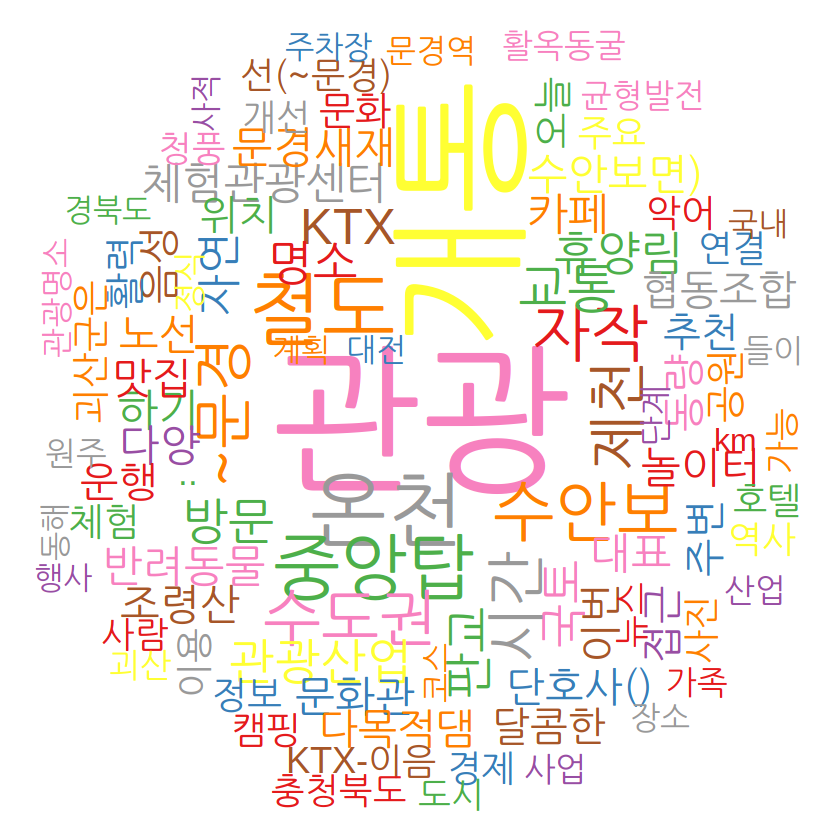

In [44]:
palete <- brewer.pal(9, 'Set1')
wordcount <- table(nouns)
wordcloud(names(wordcount), freq=wordcount, scale=c(8,1),
          rot.per=0.25, min.freq=15, 
          random.order=F, random.color=T, colors=palete)